<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
train, test = train_test_split(train, train_size=0.90, test_size=0.10, random_state=42)
print(train.shape, test.shape)

(455, 14) (51, 14)


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler.fit_transform(test)

In [5]:
scaled_train_df = pd.DataFrame(scaled_train, columns=train.columns.values)
scaled_test_df = pd.DataFrame(scaled_test, columns=test.columns.values)

In [6]:
target = 'medv'
X = scaled_train_df.drop(target, axis=1).values
Y = scaled_train_df[[target]].values
X_test = scaled_test_df.drop(target, axis=1).values
Y_test = scaled_test_df[[target]].values

In [7]:
#build our model
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

W0203 16:01:34.674477 4329852352 deprecation.py:506] From /Users/JKMacBook/opt/anaconda3/envs/NN/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# Train the model
model.fit(
    X,
    Y,
    epochs=50
)

Epoch 1/50
455/455 [==============================] - 0s 672us/sample - loss: 0.0962
Epoch 2/50
455/455 [==============================] - 0s 99us/sample - loss: 0.0418
Epoch 3/50
455/455 [==============================] - 0s 127us/sample - loss: 0.0278
Epoch 4/50
455/455 [==============================] - 0s 100us/sample - loss: 0.0181
Epoch 5/50
455/455 [==============================] - 0s 118us/sample - loss: 0.0143
Epoch 6/50
455/455 [==============================] - 0s 154us/sample - loss: 0.0127
Epoch 7/50
455/455 [==============================] - 0s 109us/sample - loss: 0.0109
Epoch 8/50
455/455 [==============================] - 0s 97us/sample - loss: 0.0095
Epoch 9/50
455/455 [==============================] - 0s 71us/sample - loss: 0.0087
Epoch 10/50
455/455 [==============================] - 0s 72us/sample - loss: 0.0086
Epoch 11/50
455/455 [==============================] - 0s 74us/sample - loss: 0.0079
Epoch 12/50
455/455 [==============================] - 0s 74us/sampl

In [10]:
scores = model.evaluate(X_test, Y_test)

51/51 [==============================] - 0s 2ms/sample - loss: 0.0047


In [11]:
scores

0.004680720103137633

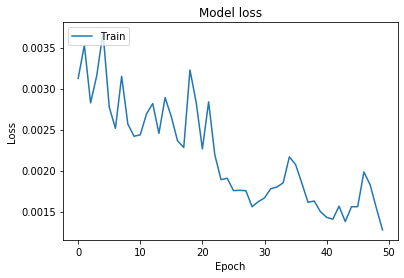

In [12]:
history = model.fit(X, Y, validation_split=0.25, epochs=50, batch_size=16, verbose=0)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encode and fit a linear regression model

target = 'medv'
X_train = train.drop(target, axis=1).values
y_train = train[[target]].values
X_test = test.drop(target, axis=1).values
y_test = test[[target]].values

pipeline = make_pipeline(
  SimpleImputer(strategy='mean'),
  LinearRegression()
)

pipeline.fit(X_train, y_train)

ty_pred = pipeline.predict(X_test)

# Print regression metrics for test
test_mse = mean_squared_error(y_test, ty_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, ty_pred)
test_r2 = r2_score(y_test, ty_pred)
print('Test Mean Squared Error:', test_mse)
print('Test Mean Absolute Error:', test_mae)
print('Test R^2:', test_r2)

Test Mean Squared Error: 14.99585287658263
Test Mean Absolute Error: 2.8342104578589704
Test R^2: 0.7598135533532476


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [14]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.